<a href="https://colab.research.google.com/github/mkesari-data/ml/blob/ml_basics/decision_tree_transportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# mount google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Daset path
dataset_path = '/content/drive/My Drive/datasets/decisiontree/transportation_mode.csv'

In [15]:
import pandas as pd
transport_df = pd.read_csv(dataset_path)

# EDA

In [19]:
# Print top rows
transport_df.head()

,Person name,Gender,Car ownership,Travel Cost,Income Level,Transportation Mode
0,Olivia Williams,Male,2,Expensive,Low,Car
1,Joseph Jones,Female,2,Cheap,High,Car
2,Robert Jackson,Male,1,Standard,High,Bus
3,Linda Jones,Female,1,Cheap,Low,Train
4,Olivia Davis,Female,1,Standard,High,Train


In [21]:
# Describe dataset
transport_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Car ownership,1000.0,1.008,0.847735,0.0,0.0,1.0,2.0,2.0


In [23]:
# Statistical analysis
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Person name          1000 non-null   object
 1   Gender               1000 non-null   object
 2   Car ownership        1000 non-null   int64 
 3   Travel Cost          1000 non-null   object
 4   Income Level         1000 non-null   object
 5   Transportation Mode  1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [25]:
#shape
transport_df.shape

(1000, 6)

## Understand Data distribution

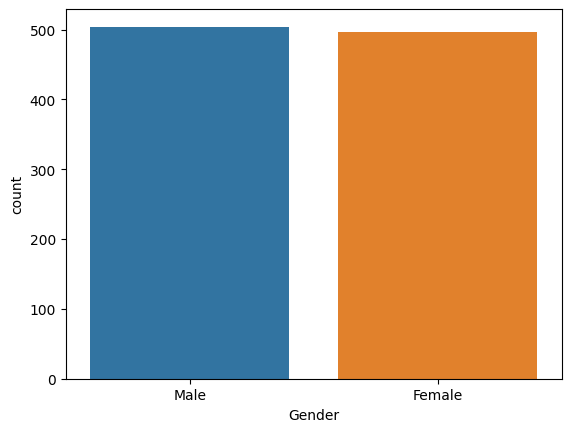

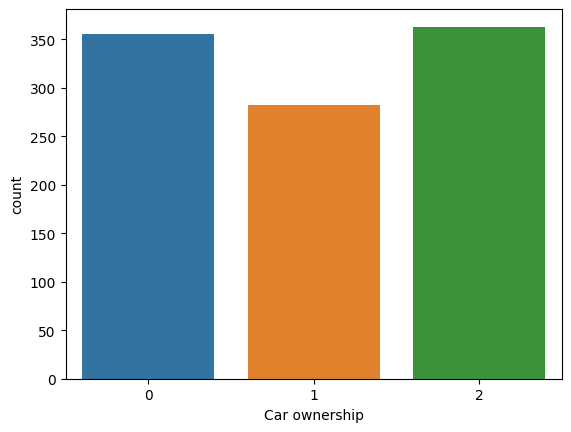

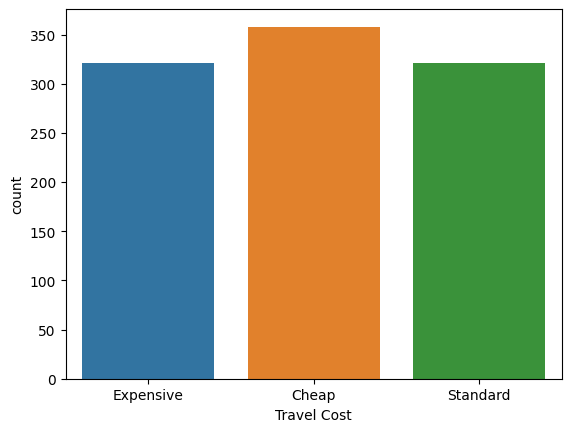

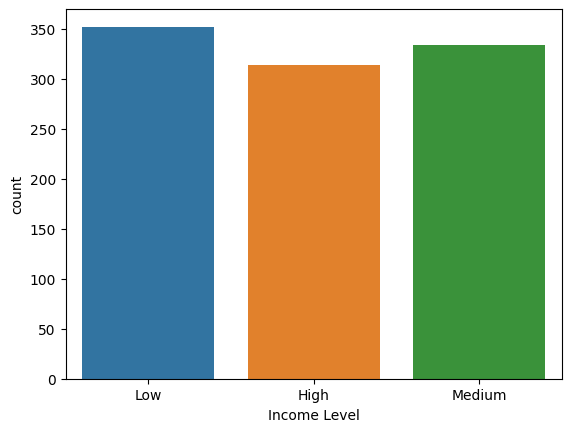

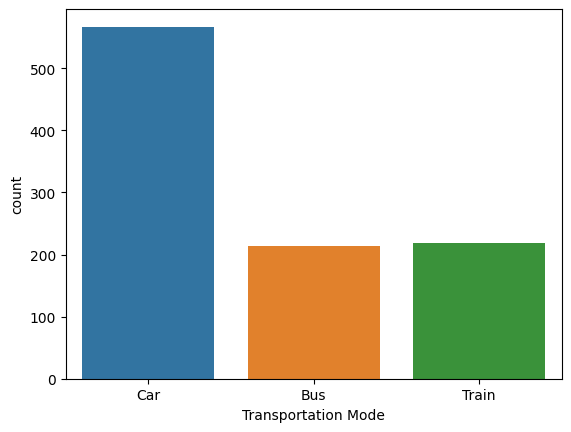

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=transport_df ,x='Gender')
plt.show()
sns.countplot(data=transport_df ,x='Car ownership')
plt.show()
sns.countplot(data=transport_df ,x='Travel Cost')
plt.show()
sns.countplot(data=transport_df ,x='Income Level')
plt.show()
sns.countplot(data=transport_df ,x='Transportation Mode')
plt.show()

# Preprocessing

In [33]:
# There are no missing values. so ignore missing values treatement step

In [35]:
#Encode categorical data.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Gender', 'Travel Cost', 'Income Level', 'Transportation Mode']

for categorical_column in categorical_cols:
  transport_df[categorical_column] = le.fit_transform(transport_df[categorical_column])

transport_df

,Person name,Gender,Car ownership,Travel Cost,Income Level,Transportation Mode
0,Olivia Williams,1,2,1,1,1
1,Joseph Jones,0,2,0,0,1
2,Robert Jackson,1,1,2,0,0
3,Linda Jones,0,1,0,1,2
4,Olivia Davis,0,1,2,0,2
...,...,...,...,...,...,...
995,Emily Garcia,0,1,0,0,2
996,Margaret Martinez,1,2,1,2,1
997,Emily Jones,0,0,2,0,2
998,Thomas Davis,0,1,1,0,1


### remove spaces in feature names.

In [38]:
transport_df.columns = [col.replace(' ' , '_') for col in transport_df.columns]
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Person_name          1000 non-null   object
 1   Gender               1000 non-null   int64 
 2   Car_ownership        1000 non-null   int64 
 3   Travel_Cost          1000 non-null   int64 
 4   Income_Level         1000 non-null   int64 
 5   Transportation_Mode  1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


# Split dataset to train and test.

In [47]:
from sklearn.model_selection import train_test_split

X = transport_df.drop(['Person_name' ,'Transportation_Mode' ] , axis=1)
y = transport_df['Transportation_Mode' ]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2)
print(X_train.shape, X_test.shape)

(800, 4) (200, 4)


# Model Buidling

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

# Model Validation

In [52]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00        56

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[ 35   0   0]
 [  0 109   0]
 [  0   0  56]]


# Model Interpretation

In [59]:
feature_importance = dt_model.feature_importances_

# Mapping each feature index to its name in the dataset
feature_names = X_train.columns

# Summarize and print feature importance
for i, v in enumerate(feature_importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))


Feature: Gender, Score: 0.24777
Feature: Car_ownership, Score: 0.27303
Feature: Travel_Cost, Score: 0.47920
Feature: Income_Level, Score: 0.00000


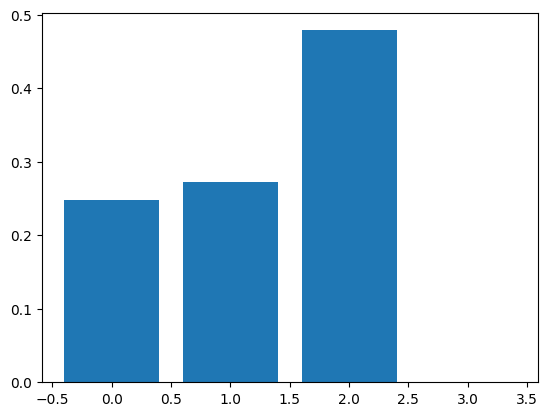

In [61]:
# Plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()